# Segmenting with Lab Color Space

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2lab
import seaborn as sns

sns.set_style("whitegrid")

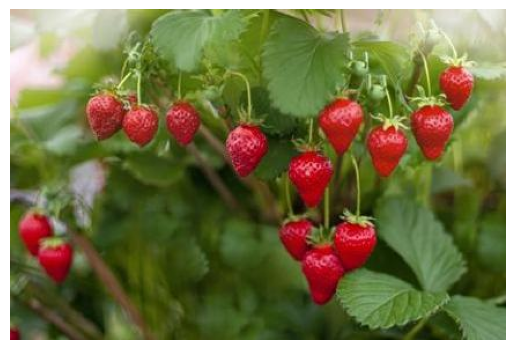

In [2]:
strawberry = cv2.imread("./images/strawberryPlant.jpg")
strawberry = cv2.cvtColor(strawberry, cv2.COLOR_BGR2RGB)

plt.imshow(strawberry)
plt.axis('off')
plt.show()

Convert an image from RGB to Lab.

In [3]:
strawberry_Lab = rgb2lab(strawberry) # https://en.wikipedia.org/wiki/CIELAB_color_space

A representation in the Lab color space has three channels:
* Luminance is stored in the first plane and contains brightness from black to white.
* The a* channel is stored in the second plane and contains a measurement of hue from green to red.
* The b* channel is stored in the third plane and contains a measurement of hue from blue to yellow.

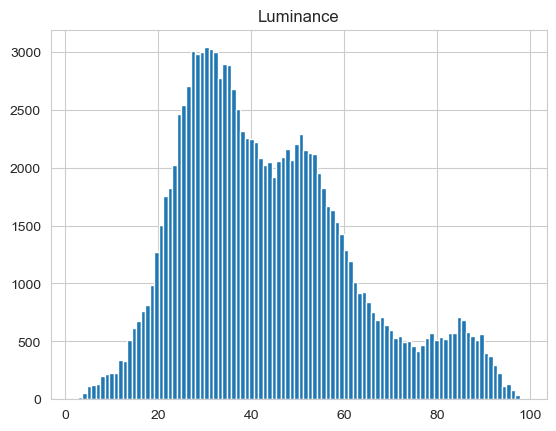

In [4]:
L = strawberry_Lab[:, :, 0]

plt.hist(L.ravel(), bins=100)
plt.title('Luminance')
plt.show()

Display the luminance plane.

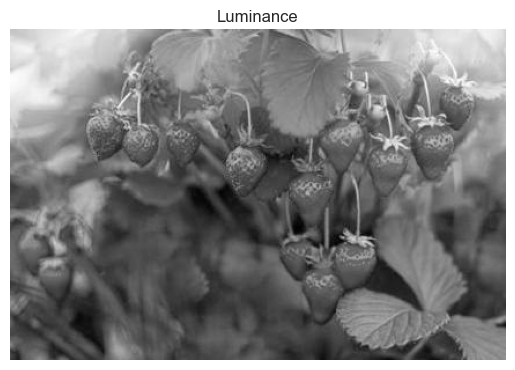

In [5]:
plt.imshow(L, cmap='gray')
plt.title('Luminance')
plt.axis('off')
plt.show()

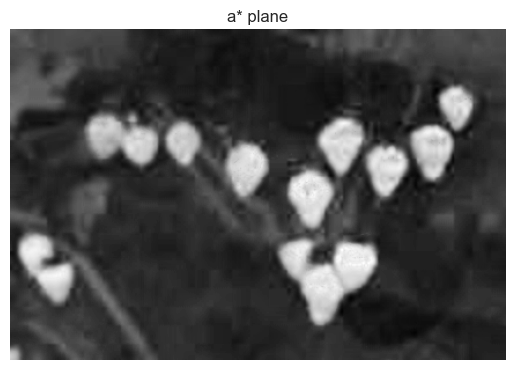

In [6]:
a = strawberry_Lab[:, :, 1]

plt.imshow(a, cmap='gray')
plt.title('a* plane')
plt.axis('off')
plt.show()

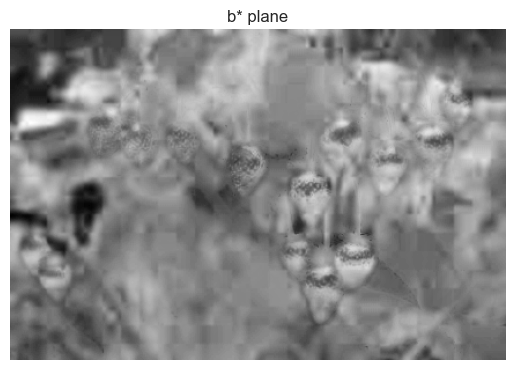

In [7]:
b = strawberry_Lab[:, :, 2]

plt.imshow(b, cmap='gray')
plt.title('b* plane')
plt.axis('off')
plt.show()

The a* plane does the best job of separating the red strawberries from the green background. We can view the intensity histogram to determine a threshold.

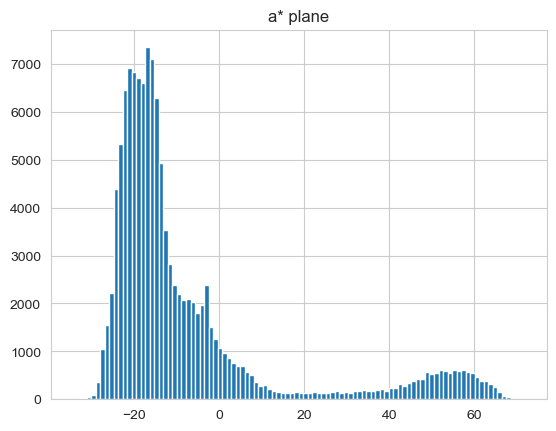

In [8]:
plt.hist(a.ravel(), bins=100)
plt.title('a* plane')
plt.show()

We can see two clusters of intensities in the a* channel. The higher values correspond to the strawberries, which have more red than green in them.

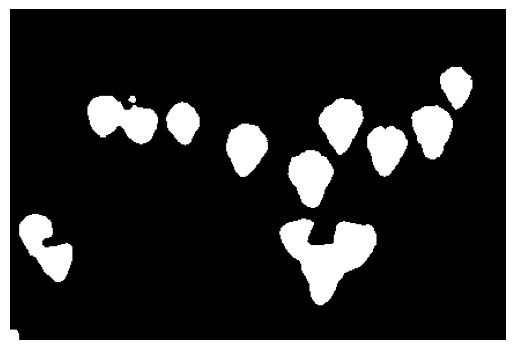

In [9]:
red_mask = a > 21

plt.imshow(red_mask, cmap='gray')
plt.axis('off')
plt.show()